<a href="https://colab.research.google.com/github/Shashwat-Tandon/Image-Enhancement-and-Colorization-using-Convolutional-Neural-Network/blob/main/Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import argparse
import cv2
import os
from PIL import Image

PROTOTXT = "D:\\VIT 5th sem\\image processing\\project\\colorization_deploy_v2.prototxt"
POINTS ="D:\\VIT 5th sem\\image processing\\project\\pts_in_hull.npy"
MODEL = "D:\\VIT 5th sem\\image processing\\project\\colorization_release_v2.caffemodel"




In [ ]:
# Load the Model
print("Load model")
net = cv2.dnn.readNetFromCaffe(PROTOTXT, MODEL)
pts = np.load(POINTS)


Load model


In [ ]:

# Load centers for ab channel quantization used for rebalancing.
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

# Load the input image
image = cv2.imread("D:\\VIT 5th sem\\image processing\\project\\result.jpg",1)
scaled = image.astype("float32") / 255.0
lab = cv2.cvtColor(scaled, cv2.COLOR_BGR2LAB)

resized = cv2.resize(lab, (224, 224))
L = cv2.split(resized)[0]
L -= 50

print("Colorizing the image")
net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

L = cv2.split(lab)[0]
colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)
colorized = np.clip(colorized, 0, 1)

colorized = (255 * colorized).astype("uint8")

cv2.imshow("Original", image)
cv2.imshow("Colorized", colorized)
cv2.waitKey(0)

Colorizing the image


-1

# Approach 1- Denoise then Colorize

In [ ]:
for i in range(100):
    name="D:\\VIT 5th sem\\image processing\\project\\secondnoise\\"+str(i)+".jpg"
    img=cv2.imread(name,0)
    dst =cv2.fastNlMeansDenoising(img, None,10,20,35)
    img = Image.fromarray(dst, "L")
    image_filename="D:\\VIT 5th sem\\image processing\\project\\method1_temp\\"+str(i)+".jpg"
    img.save(image_filename)

In [ ]:
for i in range(100):
    class8 = net.getLayerId("class8_ab")
    conv8 = net.getLayerId("conv8_313_rh")
    pts = pts.transpose().reshape(2, 313, 1, 1)
    net.getLayer(class8).blobs = [pts.astype("float32")]
    net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]
    name="D:\\VIT 5th sem\\image processing\\project\\method1_temp\\"+str(i)+".jpg"
    image = cv2.imread(name,1)
    scaled = image.astype("float32") / 255.0
    lab = cv2.cvtColor(scaled, cv2.COLOR_BGR2LAB)
    resized = cv2.resize(lab, (224, 224))
    L = cv2.split(resized)[0]
    L -= 50
    net.setInput(cv2.dnn.blobFromImage(L))
    ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

    ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

    L = cv2.split(lab)[0]
    colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

    colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)
    colorized = np.clip(colorized, 0, 1)

    colorized = (255 * colorized).astype("uint8")

    # cv2.imshow("Original", image)
    # cv2.imshow("Colorized", colorized)
    image_filename='D:\\VIT 5th sem\\image processing\\project\\method1_final\\'+str(i)+".jpg"
    img = Image.fromarray(colorized, "RGB")
    img.save(image_filename)

# Approach 2- Colorize then Denoise

In [ ]:
for i in range(100):
    class8 = net.getLayerId("class8_ab")
    conv8 = net.getLayerId("conv8_313_rh")
    pts = pts.transpose().reshape(2, 313, 1, 1)
    net.getLayer(class8).blobs = [pts.astype("float32")]
    net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

    # Load the input image
    name="D:\\VIT 5th sem\\image processing\\project\\secondnoise\\"+str(i)+".jpg"
    image = cv2.imread(name,1)
    scaled = image.astype("float32") / 255.0
    lab = cv2.cvtColor(scaled, cv2.COLOR_BGR2LAB)

    resized = cv2.resize(lab, (224, 224))
    L = cv2.split(resized)[0]
    L -= 50

    # print("Colorizing the image")
    net.setInput(cv2.dnn.blobFromImage(L))
    ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

    ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

    L = cv2.split(lab)[0]
    colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

    colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)
    colorized = np.clip(colorized, 0, 1)

    colorized = (255 * colorized).astype("uint8")
    # cv2.imshow("Original", image)

    # cv2.imshow("Colorized", colorized)
    cv2.waitKey(0)
    image_filename='D:\\VIT 5th sem\\image processing\\project\\method2_temp\\'+str(i)+".jpg"
    img = Image.fromarray(colorized, "RGB")
    img.save(image_filename)


In [ ]:
for i in range(100):
    name="D:\\VIT 5th sem\\image processing\\project\\method2_temp\\"+str(i)+".jpg"
    img=cv2.imread(name,1)
    dst =cv2.fastNlMeansDenoisingColored(img, None,10,10,13,23)
    img = Image.fromarray(dst, "RGB")
    image_filename="D:\\VIT 5th sem\\image processing\\project\\method2_final\\"+str(i)+".jpg"
    img.save(image_filename)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import skimage.io
image = skimage.io.imread(fname="D:\\VIT 5th sem\\image processing\\project\\images\\Image 1.jpg")

Text(0, 0.5, 'Pixel count')

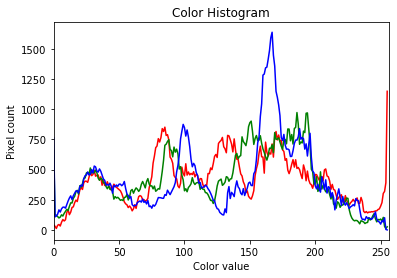

In [ ]:
colors = ("red", "green", "blue")
plt.figure()
plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

In [ ]:
image = skimage.io.imread(fname="D:\\VIT 5th sem\\image processing\\project\\method1_final\\1.jpg")

Text(0, 0.5, 'Pixel count')

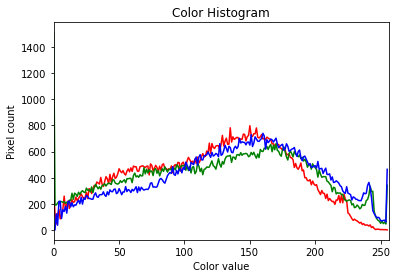

In [ ]:
colors = ("red", "green", "blue")
plt.figure()
plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

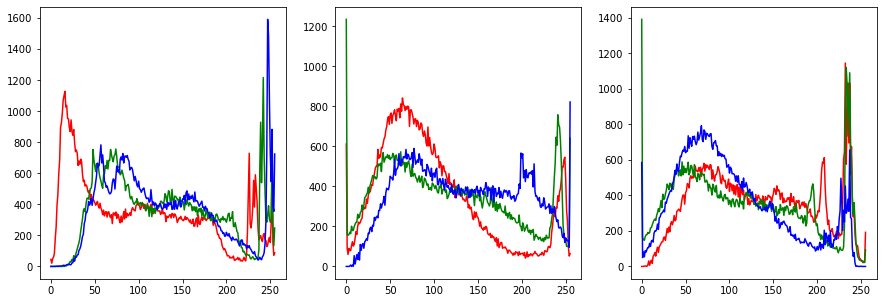

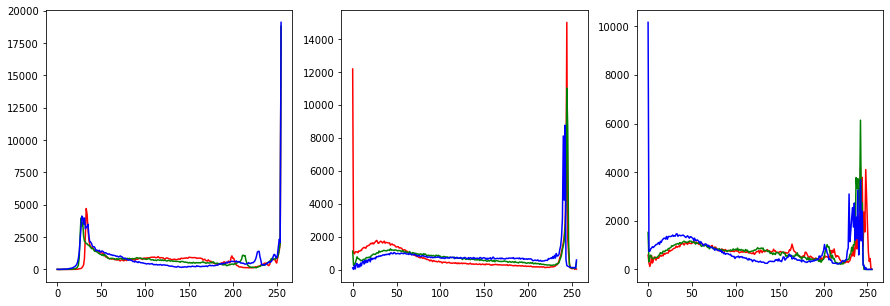

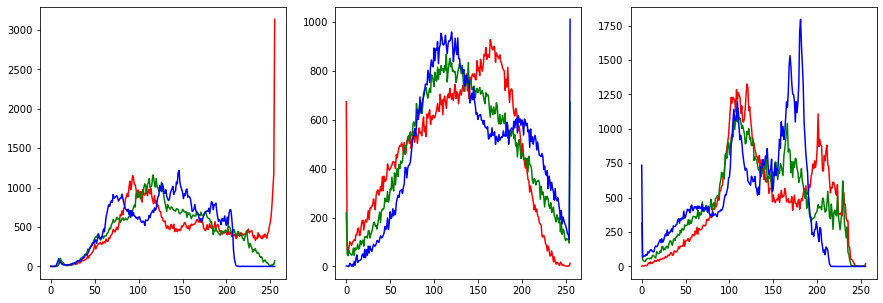

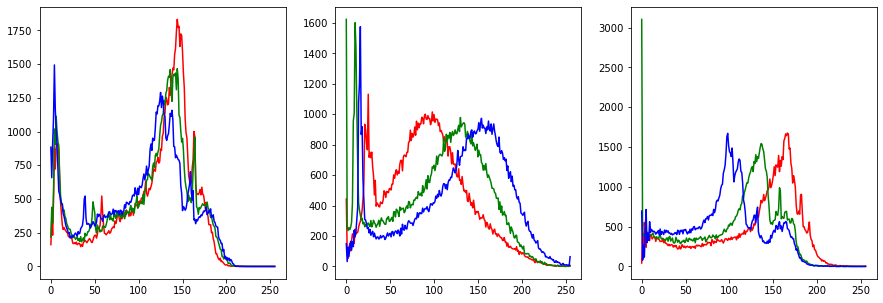

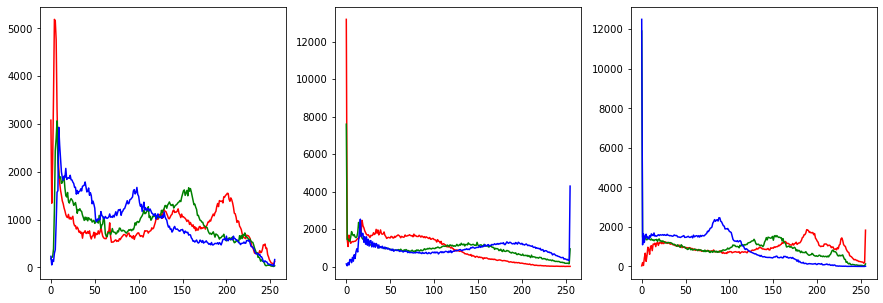

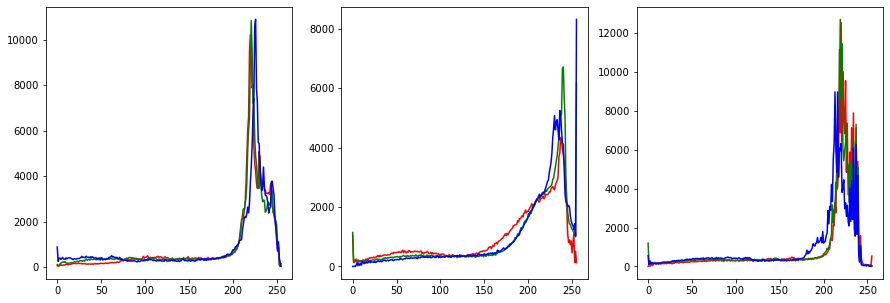

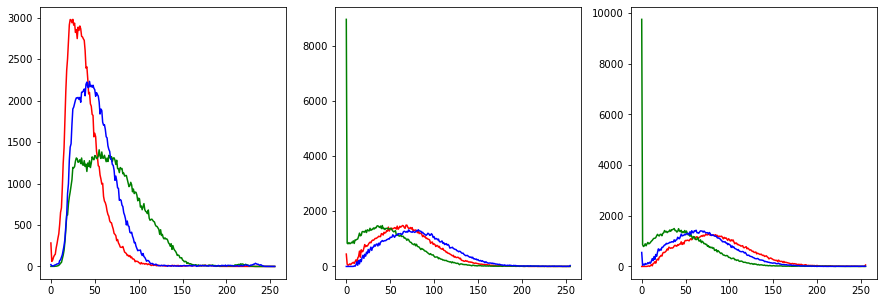

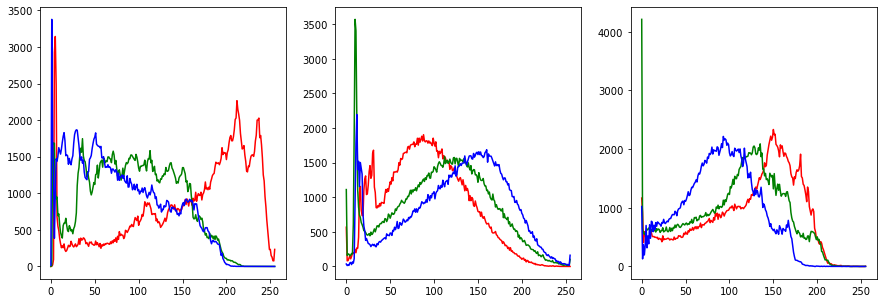

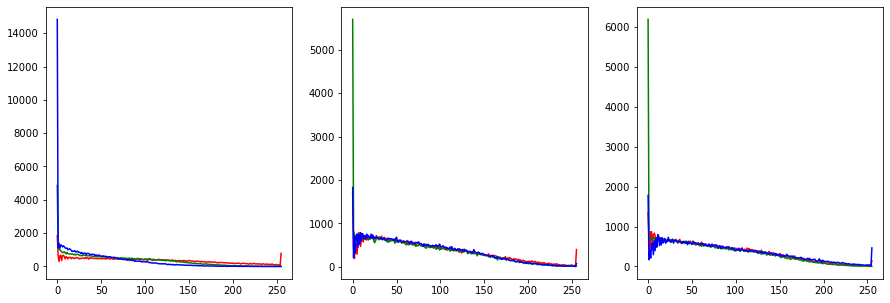

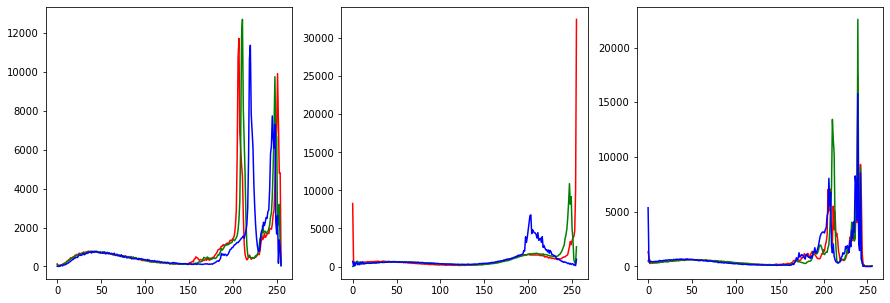

In [ ]:
for i in range(20,30):
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15, 5))
    # ax1.figure(figsize=(7,7))
    name1="D:\\VIT 5th sem\\image processing\\project\\images\\Image "+str(i)+".jpg"
    image = skimage.io.imread(fname=name1)
    colors = ("red", "green", "blue")
    for channel_id, color in enumerate(colors):
        histogram, bin_edges = np.histogram(
            image[:, :, channel_id], bins=256, range=(0, 256)
        )
        ax1.plot(bin_edges[0:-1], histogram, color=color)

    # # ax1.title("Color Histogram")
    # ax1.xlabel("Color value")
    # ax1.ylabel("Pixel count")
    image = skimage.io.imread(fname="D:\\VIT 5th sem\\image processing\\project\\method1_final\\"+str(i)+".jpg")
    colors = ("red", "green", "blue")
    for channel_id, color in enumerate(colors):
        histogram, bin_edges = np.histogram(
            image[:, :, channel_id], bins=256, range=(0, 256)
        )
        ax2.plot(bin_edges[0:-1], histogram, color=color)

    # ax2.title("Color Histogram")
    # ax2.xlabel("Color value")
    # ax2.ylabel("Pixel count")
    image = skimage.io.imread(fname="D:\\VIT 5th sem\\image processing\\project\\method2_final\\"+str(i)+".jpg")
    colors = ("red", "green", "blue")
    for channel_id, color in enumerate(colors):
        histogram, bin_edges = np.histogram(
            image[:, :, channel_id], bins=256, range=(0, 256)
        )
        ax3.plot(bin_edges[0:-1], histogram, color=color)

In [ ]:
count1=int(0)
count2=int(0)
for i in range(100):
    image = cv2.imread("D:\\VIT 5th sem\\image processing\\project\\images\\Image "+str(i)+".jpg")
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    histogram = cv2.calcHist([gray_image], [0],None, [256], [0, 256])
    image = cv2.imread("D:\\VIT 5th sem\\image processing\\project\\method1_final\\"+str(i)+".jpg")
    gray_image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    histogram1 = cv2.calcHist([gray_image1], [0],None, [256], [0, 256])
    image = cv2.imread("D:\\VIT 5th sem\\image processing\\project\\method2_final\\"+str(i)+".jpg")
    gray_image2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    histogram2 = cv2.calcHist([gray_image2], [0],None, [256], [0, 256])
    c1, c2 = 0, 0

    # Euclidean Distance between Original and Method1
    i = 0
    while i<len(histogram) and i<len(histogram1):
        c1+=(histogram[i]-histogram1[i])**2
        i+= 1
    c1 = c1**(1 / 2)
    # Euclidean Distance between Original and Method2
    i = 0
    while i<len(histogram) and i<len(histogram2):
        c2+=(histogram[i]-histogram2[i])**2
        i+= 1
    c2 = c2**(1 / 2)
    count1=count1+c1
    count2=count2+c2

In [ ]:
count1

array([1527363.1], dtype=float32)

In [ ]:
print("Average Euclidean Distance between Original and Method1:",count1/100)

Average Euclidean Distance between Original and Method1: [15273.631]


In [ ]:
count2

array([1496540.2], dtype=float32)

In [ ]:
print("Average Euclidean Distance between Original and Method2:",count2/100)

Average Euclidean Distance between Original and Method2: [14965.402]


In [ ]:
if(count1<count2):
    print("Method1 Produces More similar results to The Original Image than Method2")
else:
    print("Method2 Produces More similar results to The Original Image than Method1")

Method2 Produces More similar results to The Original Image than Method1
